# Sigmoid Neuron 
Sigmoid neurons are similar to perceptron neuron but then the only difference between them is that Sigmoid neuron are smoother than percentron neurons. Here the output of perceptron is passed through sigmoid function to make it more smoother than its prevous 

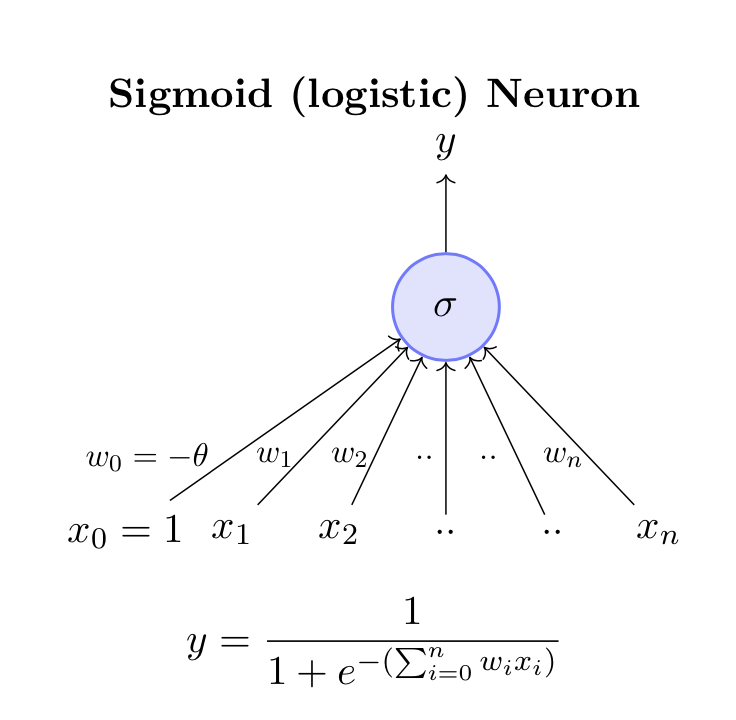

# Sigmoid Neuron is 

* Continous
* Smooth
* Differentiable

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import ipywidgets as widgets
from ipywidgets import HBox, VBox

In [2]:
# code implementation of above formula
def sigmoid(x: list, w: list, b: float):
    return 1 / (1 + np.exp(-(np.dot(x, w) + b)))

### Try changing weight and bias values using slider

* Changing weight will result into change in stepness of curve.
* Chaning bias will shift the curve.

In [3]:
# for 1 input
xs = np.arange(-10, 10, 0.1)
w = 1
b = 0

@widgets.interact(weight=(-50,50), bias=(-30, 30))
def plot_sigmoid(weight=1., bias=0):
    plt.plot(xs, sigmoid(xs, weight, bias))

interactive(children=(IntSlider(value=1, description='weight', max=50, min=-50), IntSlider(value=0, descriptio…

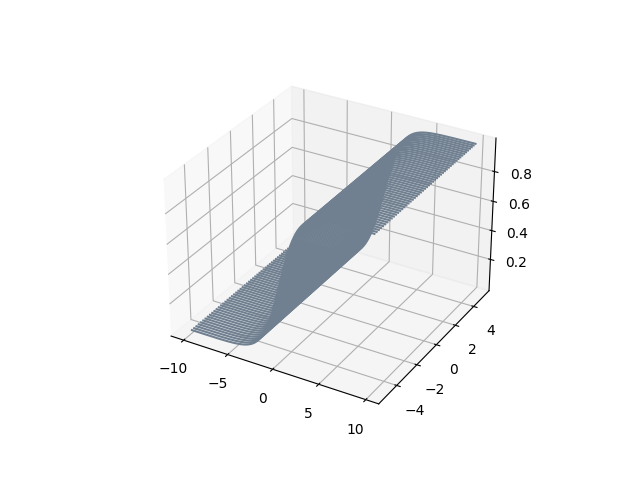

In [4]:
%matplotlib widget
ax = plt.figure().add_subplot(projection='3d')

x1 = np.arange(-10, 10, 0.1) 
x2 = np.arange(-5, 5, 0.1999) 

# try changing value of w1 and b
w1 = 1
b = 0

# as w2 needs to be set to 0 to get the below figure I have not included it in the defination

def sigmoid2d(x1, w1, b=1):
    return 1 / (1 + np.exp(-(x1 * w1 + b))) 

zs = sigmoid2d(x1, w1, b)
 
for i in x2:
    dummy = [i for _ in range(len(x1))]
    plt.plot(x1, dummy, zs, 'slategray')

# Learning Algorithm

We are going to use gradient descent for getting our optimized weight and bias which will make the sigmoid curve go through both the points
 
# How does gradient descent works? 

For gradient descent first we calculate gradient vector. Gradient vector contains partial derivative of loss function with respect to weight and bias. 
The loss function we have used is 

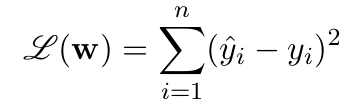 

## Gradient Descent algorithm looks like this

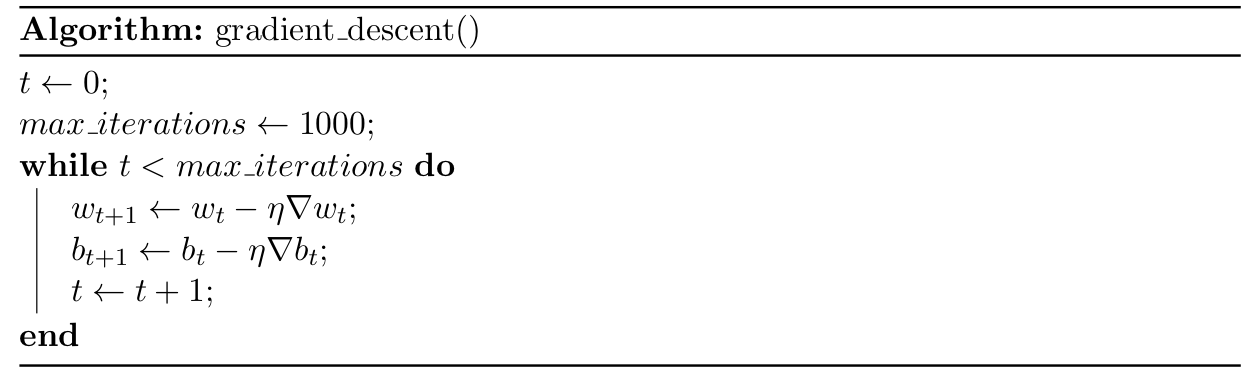

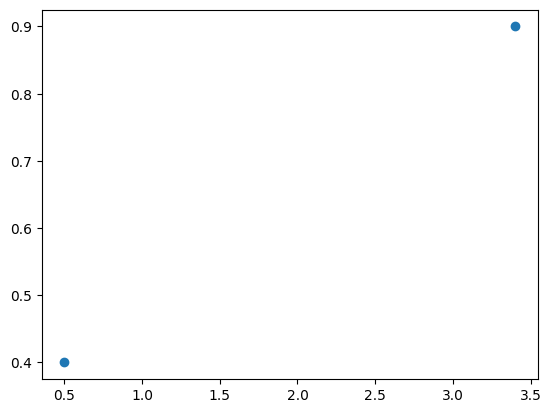

In [5]:
# find sigmoid function which passes through both points
%matplotlib inline
X = [0.5, 3.4]
Y = [0.4, 0.9]

plt.scatter(X, Y) 

# Mannual Gradient Descent

In [6]:
import sys
sys.path.append("lib") 

In [7]:
from lib.sigmoid_neuron import SigmoidNeuron

In [8]:
s = SigmoidNeuron() 

In [9]:
weight_slider = widgets.FloatSlider(
    value=1.,
    min=-5., max=+5., step=0.2,
    description="weight",
    readout_format='.1f',
)
bias_slider = widgets.FloatSlider(
    value=1.,
    min=-5., max=+5., step=0.2,
    description="bias",
    readout_format='.1f',
)

### Try adjusting weight and bias parameter using slider inorder to reduce error

interactive(children=(FloatSlider(value=1.0, description='weight', max=5.0, min=-5.0, readout_format='.1f', st…

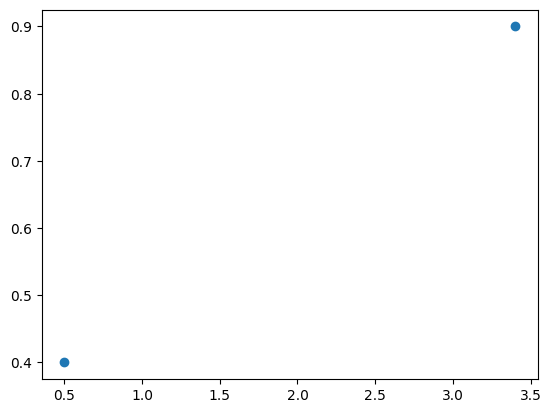

In [10]:
%matplotlib inline
x_lin = np.arange(-10, 10, 0.1)

@widgets.interact(w=weight_slider, b=bias_slider) 
def plot(w=1, b=0):
    
    s.weight = w
    s.bias = b  
    
    plt.scatter(X, Y)
    
    s.train(X, Y, max_epochs=1) 
       
    plt.plot(x_lin, s.sigmoid(x_lin))     

# Automated Gradient Descent

In [11]:
s = SigmoidNeuron()

In [12]:
# got a sigmoid function which passes through both the points

x_lin = np.arange(-10, 10, 0.1)
 
def visualize(): 
    for i in range(2000): 
        s.gradient_descent(X, Y, 1, False) 
        if i % 200 == 0:
            plt.scatter(X, Y)
            plt.plot(x_lin, s.sigmoid(x_lin))     

visualize()

AttributeError: 'SigmoidNeuron' object has no attribute 'train'

In [ ]:
# 3d error surface  
def calculate_error(x, w, b):
    err = 0.0
    
    for x, y in zip(X, Y):
        fx = sigmoid(x, w, b)
        err += (fx - y) ** 2
        
    return err  

In [ ]:
%matplotlib widget
ws = np.arange(-5, 5, 0.1)
bs = np.arange(-5, 5, 0.1)

w_mesh, b_mesh = np.meshgrid(ws, bs)

error = np.zeros(w_mesh.shape)

for i in range(100):
    for j in range(100):
        error[i][j] = calculate_error(0.1, w_mesh[i][j], b_mesh[i][j])

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
  
ax.scatter(s.weight, s.bias, s.error(X, Y), 'o')

ax.plot_surface(w_mesh, b_mesh, error, cmap=cm.coolwarm, linewidth=0) 